# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
#Submit request and format output
btc_url = btc_url + "?format=json"
response_data = requests.get(btc_url).json()

# Fetch current BTC price
my_btc_value = response_data["data"]["1"]["quotes"]["USD"]["price"]

#Submit request and format output
eth_url = eth_url + "?format=json"
response_data = requests.get(eth_url).json()

# Fetch current ETH price
my_eth_value = response_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
btc_value = my_btc * my_btc_value
eth_value = my_eth * my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $19958.54
The current value of your 5.3 ETH is $1088.41


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [17]:
# Set current amount of shares
my_agg = 200
my_spy = 110

In [18]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [19]:
# Format current date as ISO format
today = pd.Timestamp("2022-07-08", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2022-07-08 04:00:00+00:00  101.35  101.4499  101.16  101.23  5269814   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-07-08 04:00:00+00:00       19181  101.268556  387.16  390.64  385.66   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-07-08 04:00:00+00:00  388.67  72468892      509776  388.661805

In [20]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $101.23
Current SPY closing price: $388.67


In [21]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 110 SPY shares is $42753.70
The current value of your 200 AGG shares is $20246.00


### Savings Health Analysis

In [22]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = btc_value + eth_value
shares = my_agg_value + my_spy_value

amount_data = {"amount":[crypto, shares]}
index_data = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(amount_data, index=index_data)

# Display savings DataFrame
display(df_savings)

,amount
crypto,29718.821
shares,62999.700


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

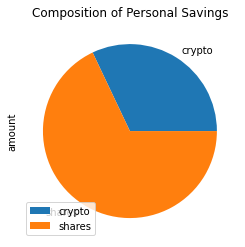

In [25]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
goal_value = emergency_fund - total_savings

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")

elif total_savings == emergency_fund:
    print("Congratulations! You have reached your emergency fund goal.")

else:
    print(f"You are {goal_value} dollars away from reaching your emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [28]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-07-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-07-12', tz='America/New_York').isoformat()

In [30]:
## Get 5 years' worth of historical data for SPY and AGG
# Set timeframe to "1Day"
timeframe = "1Day"

# Set the ticker information
tickers = ["SPY", "AGG"]

# Get 5 year's worth of historical price data
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=["SPY","AGG"])

# Display sample data
df_stock_data.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2017-07-12 04:00:00+00:00  243.31  244.20  243.30  244.01  59610405   
2017-07-13 04:00:00+00:00  244.02  244.55  243.76  244.42  39471637   
2017-07-14 04:00:00+00:00  244.40  245.97  244.31  245.56  60262692   
2017-07-17 04:00:00+00:00  245.44  245.91  245.33  245.53  33531417   
2017-07-18 04:00:00+00:00  245.06  245.72  244.67  245.66  42742498   

                                                      AGG                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2017-07-12 04:00:00+00:00      182031  243.689327  109.38  109.4300  109.26   
2017-07-13 04:00:00+00:00      137309  244.291072  109.29  109.3118  109.13   
2017-07-14 04:00:00+00:00      181871  245.236410  109.54  109.5600  109.29   
2017-07-17 04:00:00+00:00      121923  245.602156  109.40  109.4800  109.32   
2017-07-18 04:00:00+00:00      154171  245.338852  109.64  109.7100  109.58   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-07-12 04:00:00+00:00  109.38  2129850        8686  109.342204  
2017-07-13 04:00:00+00:00  109.26  1568304        8104  109.224824  
2017-07-14 04:00:00+00:00  109.37  1916631        9255  109.398524  
2017-07-17 04:00:00+00:00  109.42  4078495       11508  109.417708  
2017-07-18 04:00:00+00:00  109.67  2878592       10658  109.651331

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Daily = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [32]:
# Printing the simulation input data
MC_Daily.portfolio_data.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2017-07-12 04:00:00+00:00  243.31  244.20  243.30  244.01  59610405   
2017-07-13 04:00:00+00:00  244.02  244.55  243.76  244.42  39471637   
2017-07-14 04:00:00+00:00  244.40  245.97  244.31  245.56  60262692   
2017-07-17 04:00:00+00:00  245.44  245.91  245.33  245.53  33531417   
2017-07-18 04:00:00+00:00  245.06  245.72  244.67  245.66  42742498   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-07-12 04:00:00+00:00      182031  243.689327          NaN  109.38   
2017-07-13 04:00:00+00:00      137309  244.291072     0.001680  109.29   
2017-07-14 04:00:00+00:00      181871  245.236410     0.004664  109.54   
2017-07-17 04:00:00+00:00      121923  245.602156    -0.000122  109.40   
2017-07-18 04:00:00+00:00      154171  245.338852     0.000529  109.64   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2017-07-12 04:00:00+00:00  109.4300  109.26  109.38  2129850        8686   
2017-07-13 04:00:00+00:00  109.3118  109.13  109.26  1568304        8104   
2017-07-14 04:00:00+00:00  109.5600  109.29  109.37  1916631        9255   
2017-07-17 04:00:00+00:00  109.4800  109.32  109.42  4078495       11508   
2017-07-18 04:00:00+00:00  109.7100  109.58  109.67  2878592       10658   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-07-12 04:00:00+00:00  109.342204          NaN  
2017-07-13 04:00:00+00:00  109.224824    -0.001097  
2017-07-14 04:00:00+00:00  109.398524     0.001007  
2017-07-17 04:00:00+00:00  109.417708     0.000457  
2017-07-18 04:00:00+00:00  109.651331     0.002285

In [33]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Daily.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\eduar\OneDrive\Documents\BootCamp\GitHub\Financial-Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999301,0.997483,0.989476,1.012472,1.000748,1.002961,1.003205,1.009500,0.989125,1.003015,...,0.990111,1.005826,0.998844,0.996079,0.995715,1.006573,0.995790,0.997046,1.007304,1.000014
2,1.012119,0.991026,0.999370,1.002995,0.993063,0.996927,0.999287,0.998194,0.987003,1.004147,...,0.985611,1.011157,1.006463,1.004484,0.989780,1.015615,0.998390,0.985778,0.999504,1.003737
3,1.013979,0.984862,1.008416,1.011516,1.001818,1.005680,1.010614,0.982432,0.998152,1.007138,...,0.991116,1.021575,1.007811,0.993462,0.977076,1.010964,1.000630,0.972208,0.988003,1.004477
4,1.000310,0.971370,0.998290,1.010210,1.009158,1.005608,1.011300,0.976214,0.997209,0.989980,...,0.987950,1.016645,1.011582,0.988929,0.984470,1.014201,1.014769,0.973145,1.006340,1.015973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.418007,2.972815,3.473074,9.513713,2.646277,2.334158,4.896580,1.964232,3.483526,3.207510,...,9.817120,2.382554,3.631573,10.765730,6.886866,5.689513,4.662992,4.897825,1.285103,2.887617
7557,6.424073,2.945024,3.450390,9.584001,2.604247,2.325744,4.862489,1.985106,3.471245,3.201913,...,9.885140,2.352980,3.656214,10.817525,6.877510,5.711389,4.674845,4.942665,1.286312,2.906122
7558,6.418782,2.953573,3.511695,9.552967,2.643065,2.335468,4.845974,1.972722,3.475695,3.203257,...,9.859418,2.357376,3.665047,10.692581,6.968583,5.788372,4.697133,4.927702,1.300398,2.877915
7559,6.415272,2.916865,3.475356,9.561898,2.643670,2.348831,4.839250,1.992442,3.506033,3.184622,...,9.763762,2.348994,3.689439,10.718983,6.934396,5.771998,4.753263,4.918110,1.281442,2.861952


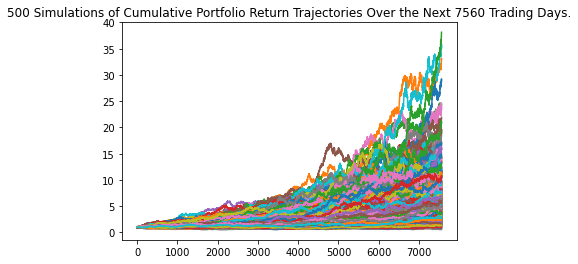

In [34]:
# Plot simulation outcomes
line_plot = MC_Daily.plot_simulation()

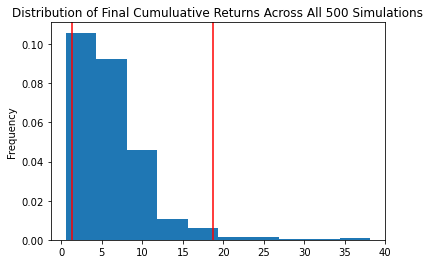

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Daily.plot_distribution()

### Retirement Analysis

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_tbl = MC_Daily.summarize_cumulative_return()

# Print summary statistics
print(sum_tbl)

count           500.000000
mean              6.317458
std               4.719061
min               0.554797
25%               3.125962
50%               4.954090
75%               8.118866
max              38.133127
95% CI Lower      1.301724
95% CI Upper     18.692804
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [38]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_tbl[8]*20000,2)
ci_upper = round(sum_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $26034.49 and $373856.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")